In [117]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
url="https://bdfed.stitch.mlbinfra.com/bdfed/stats/player?stitch_env=prod&season=2023&sportId=23&stats=season&group=hitting&gameType=R&limit=1000&offset=0&sortStat=onBasePlusSlugging&order=desc&playerPool=ALL_CURRENT&leagueIds=125"

In [32]:
r=requests.get(url).json()

In [33]:
len(r["stats"])

343

In [44]:
nombres=[]
positions=[]
promedio=[]
hr=[]
equipo=[]
for i in range(len(r["stats"])):
    nombres.append(r["stats"][i]["playerFullName"])
    positions.append(r["stats"][i]["primaryPositionAbbrev"])
    promedio.append(r["stats"][i]["avg"])
    hr.append(r["stats"][i]["homeRuns"])
    equipo.append(r["stats"][i]["teamName"])
    

In [65]:
df=pd.DataFrame({"nombre_jugador":nombres,"equipo":equipo,"posicion":positions,"avg":promedio,"home_runs":hr})
#Transformar avg a float
df["avg"]=df["avg"].astype(float)
df.sort_values(by="home_runs",ascending=False).head(20)

,nombre_jugador,equipo,posicion,avg,home_runs
30,Felix Perez,Toros de Tijuana,RF,0.258,15
5,Peter O'Brien,Pericos de Puebla,OF,0.388,13
28,Kyle Martin,Guerreros de Oaxaca,1B,0.269,13
29,Ademar Rifaela,Guerreros de Oaxaca,LF,0.341,12
7,Didi Gregorius,Algodoneros Union Laguna,SS,0.359,11
82,Angel Reyes,Rieleros de Aguascalientes,OF,0.283,11
9,Rainel Rosario,Saraperos de Saltillo,LF,0.358,10
41,Jose Carlos Urena,Guerreros de Oaxaca,LF,0.304,10
42,Alejandro Mejia,Bravos de Leon,3B,0.323,10
14,Roberto Ramos,Diablos Rojos del Mexico,1B,0.328,10


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nombre_jugador  343 non-null    object 
 1   equipo          343 non-null    object 
 2   posicion        343 non-null    object 
 3   avg             343 non-null    float64
 4   home_runs       343 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 13.5+ KB


In [71]:
top_players = df.sort_values(by="home_runs", ascending=False).head(15)

Text(0.55, 0.004, 'Fuente: @claudiodanielpc con datos de la Liga Mexicana de Béisbol.')

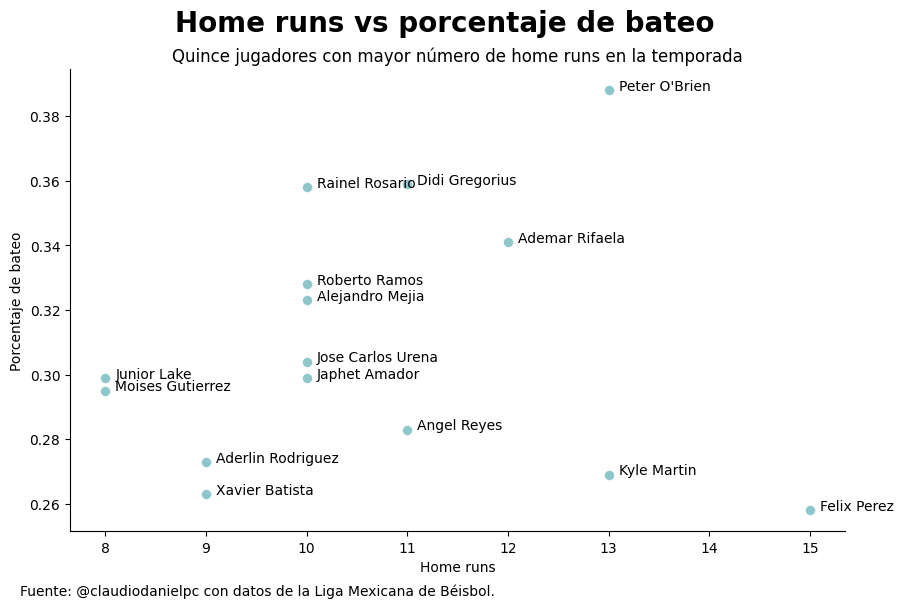

In [120]:
#Hacer scatterplot con los 15 jugadores con más home runs
fig=plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_players,x="home_runs",y="avg",color="#1c9099",s=50,alpha=0.5)
plt.suptitle("Home runs vs porcentaje de bateo",fontsize=20,fontweight="bold")
plt.title("Quince jugadores con mayor número de home runs en la temporada",fontsize=12)
plt.xlabel("Home runs")
plt.ylabel("Porcentaje de bateo")
for line in top_players.index:
    plt.text(x=top_players.home_runs[line]+0.1,
             y=top_players.avg[line],
             s=top_players.nombre_jugador[line],
             fontdict=dict(color="black",size=10))
#Eliminar borde derecho y superior
sns.despine()
#Fuente
fig.text(0.55,0.004,"Fuente: @claudiodanielpc con datos de la Liga Mexicana de Béisbol.",fontsize=10,ha="right")